In [108]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../datasets/mall_customers/Mall_Customers.csv')




In [109]:
X = df.drop(columns=["CustomerID"])

In [110]:
mapping = {"Male": 0, "Female": 1}
X["Female"] = X["Gender"].map(mapping)
X = X.drop(columns=['Gender'])
# Encoding as Is Female

In [111]:
X

,Age,Annual Income (k$),Spending Score (1-100),Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


In [112]:
num_features = df.columns

In [113]:
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

num_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cat_features = ['Female']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
    ]
)

X_scaled = preprocessor.fit_transform(X)


In [114]:
X_scaled.shape

(200, 4)

In [115]:
from sklearn.cluster import KMeans

inertias = []
K_range = range(1, 20)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)


In [116]:
inertias

[649.2800000000001,
 438.5224115567775,
 344.405428869535,
 254.28290726083475,
 216.7849015165104,
 181.95143624341458,
 164.9332804718141,
 150.89364846125565,
 138.1494202863591,
 131.18270203867664,
 119.33812260681191,
 110.5416620261875,
 104.2457857553993,
 96.78027583023905,
 90.08734636854153,
 86.07214727772521,
 80.36796756793349,
 78.82421919214536,
 75.45529940552319]

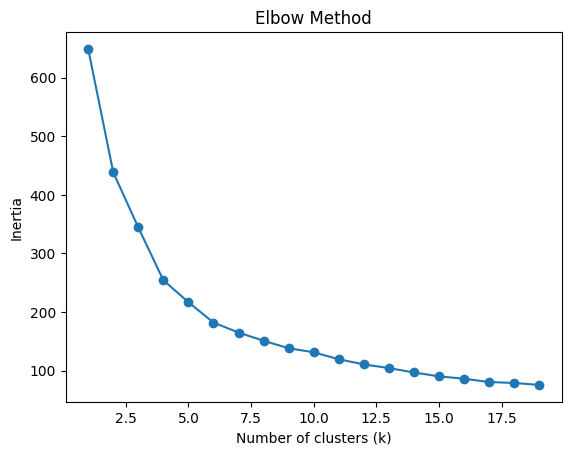

In [117]:
import matplotlib.pyplot as plt

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [118]:
kmeans = KMeans(n_clusters=6, n_init=10)
clusters = kmeans.fit_predict(X_scaled)


In [119]:
clusters.shape

(200,)

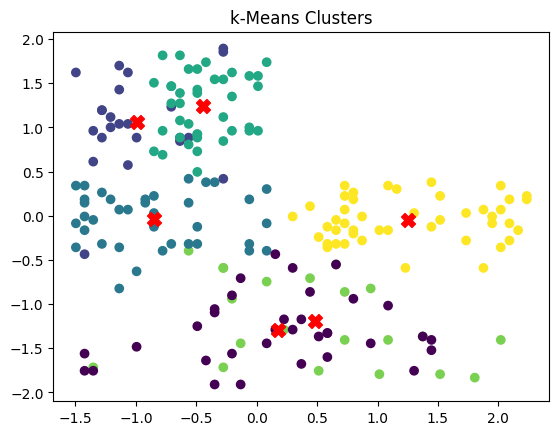

In [123]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=clusters, cmap='viridis')
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 2],
    s=100, c='red', marker='X'
)
plt.title("k-Means Clusters")
plt.show()


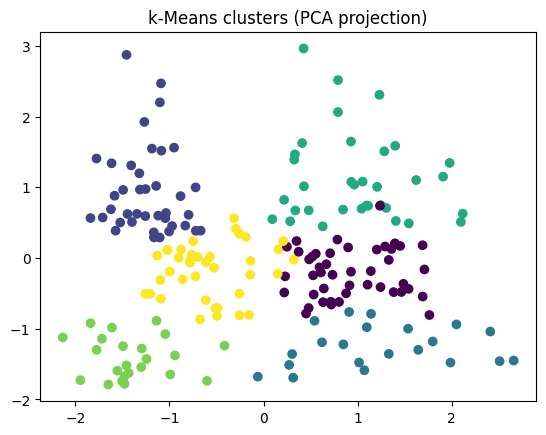

In [126]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis")
plt.title("k-Means clusters (PCA projection)")
plt.show()
